In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

## Tossing Coins

Probabilities are _theoretical_ quantities that underly the data generating process.

Formally, the quantity $\frac{1}{2}$ is called _probability_.

Probabilities assigns scores between $0$ and $1$ to outcomes of interest called events.

Statistics are _empirical_ quantities that are computed as functions of the observed data.

The frequencies when tossing a coin $\frac{\text{num of heads}}{n}$ and $\frac{\text{num of tails}}{n}$ are statistics not probabilities.

Estimators produces estimates of model parameters such as probabilities when given a dataset.

One natural estimator is the ratio of the _observed_ heads to the total number of tosses.

When estimators satiisfy the _consistency_ property, it ensures estimates converge to the true probabilities. This helps predict statistical properties of future data from the same population.


Sampling is the drawing of realizations from underlying random process.


In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [46, 54]


We can simulate multiple draws from a finite-outcome variable using the `multinomal` function. The first argument is the number of draws and the second is the probability vector.

In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([53., 47.])

Dividing by the number of tosses gives the frequency of each outcome.

In [4]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5400, 0.4600])

Here's what happens when simulating a 10,000 tosses.

In [5]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5035, 0.4965])

As told by the _law of large numbers_ when the number of repetitions grow, the estimates are guaranteed to converge to the true underlying probabilities.

Additionally, the _central limit theorem_ tells that as the sample size $n$ grows, the errors should go down at a rate of $\frac{1}{\sqrt{n}}$.

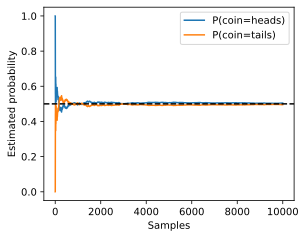

In [6]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0) # vertical sum
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

## Discussion

The sections on _A More Formal Treatment_, _Random Variables_, _Multiple Random Variables_, _An Example_, and _Expectations_ were skipped over as they are discussed previously during EEE 137.

The notes are found here:
- [Probability and random variables](https://drive.google.com/file/d/10INcn1D68CkIjJZoaiFUUiTcs32p2aQP/view?usp=sharing)
- [Stochastic processes](https://drive.google.com/file/d/10Jmj2tzTvQXZzLliH5FQmv3kuU1CMSzC/view?usp=sharing)
- [Statistical inference and estimation](https://drive.google.com/file/d/10IOhWv644qwP_2s63FaqyXrUvwU9UgFl/view?usp=sharing)

Uncertainties in machine learning may stem from label values, parameters estimates, and more. It is also uncertain whether new data at deployment matches the distribution of the training data.

There are two types of uncertainties.
- Aleatoric uncertainty: intrinsic randomness, cannot be reduced.
- Epistemic uncertainty: uncertainty in model parameters, can be reduced with more data. An example is

Sampling data from unknown probability distributions helps estimate underlying distrubtions, however it is slow.

Estimators improve at a rate of $\frac{1}{\sqrt{n}}$. Meaning, more data reduces uncertainty but at the cost of diminishing returns.

For instance, increasing samples from 10 to 1000 improves uncertainty tenfold. But the next 1000 observations only offer a measly 1.41x reduction

Bayes' theorem, as observed below, helps update probability using prior knowledge and observed data.

$\displaystyle P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B \vert A) P(A)}{P(B)}$

where:
- $P(A)$ is the prior probability.
- $P(A \vert B)$ is the posterior probability.
- $P(B \vert  A)$:  is the likelihood.
- $P(B)$ : is the marginal.


There are many probability distributions and are categorized as discrete or continuous. More detailed explanations on [this note](https://drive.google.com/file/d/10INcn1D68CkIjJZoaiFUUiTcs32p2aQP/view?usp=sharing). Additionally, a summarized table is found at [this note](https://drive.google.com/file/d/10IOhWv644qwP_2s63FaqyXrUvwU9UgFl/view?usp=sharing).

Probability distributions has their own expectations and variances, which understand each of their behavior.

Chebyshev’s inequality ensures that at least 50% of values lie within $[-\sqrt{2}\sigma, \sqrt{2}\sigma]$.

## Exercises